# Part I - (Data exploration of Top flight football teams in Europe)
## by (Omasan Akperi)

## Introduction
> This dataset contains the points that each team in the top 6 leagues in Europe got between 2014 and 2019 and other metrics of the teams in the top flight in that period. The data was gotten from kaggle (https://www.kaggle.com/datasets/slehkyi/extended-football-stats-for-european-leagues-xg)

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('understat.com.csv')


In [3]:
# Overview of data shape and composition
def printing(listing):
    for i in listing:
        print(i)


In [4]:
listing = [df.shape, df.dtypes, df.info()]
printing(listing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
League          684 non-null object
Year            684 non-null int64
position        684 non-null int64
team            684 non-null object
matches         684 non-null int64
wins            684 non-null int64
draws           684 non-null int64
loses           684 non-null int64
scored          684 non-null int64
missed          684 non-null int64
pts             684 non-null int64
xG              684 non-null float64
xG_diff         684 non-null float64
npxG            684 non-null float64
xGA             684 non-null float64
xGA_diff        684 non-null float64
npxGA           684 non-null float64
npxGD           684 non-null float64
ppda_coef       684 non-null float64
oppda_coef      684 non-null float64
deep            684 non-null int64
deep_allowed    684 non-null int64
xpts            684 non-null float64
xpts_diff       684 non-null float64
dtypes: float64(11), int64(11),

In [5]:
#df.League.value_counts()

In [6]:
# changes year to string
df.Year = df.Year.astype('str')

In [7]:
# rename columns with confusing names
df.rename(columns = {'missed':'conceded', 'deep':'passes', 'deep_allowed':'passes_allowed'}, inplace = True)

### What is the structure of your dataset?

> There are 684 rows of football team stats in a season in the dataset with 24 columns which include: 
- The league that the team was in (League) 
- The year the team played (Year) 
- The position of the team in that year (Position)
- The name of the team (team) 
- The number of matches played in that season(matches)
- The number of wins the team had (wins) 
- The number of draws the team had (draws) 
- The number of loses the team had (loses)
- The number of goals the team scored (scored) 
- The number of goals the team conceded (conceded) 
- The number of points the team got (pts) where a win gives 3 points, a draw 1 point and a loss 0 points 
- xG is an expected goals metric, it is a statistical measurement of the quality of goalscoring chances and the likelihood of them being scored 
- While xG_diff is the difference between actual goals scored and expected goals, i.e scored and xG 
- npxG is the expected goals without penalties and own goals
- xGA is expected conceded goals 
- xGA_diff is the difference between goals conceded and expected goals conceded 
- npxGA is expected goals against without penalties and own goals 
- npxGD is the difference between "for" and "against" expected goals without penalties and own goals 
- ppda_coef is opponent passes allowed per defensive action in the opposition half (power of pressure) it indicates the frequency of a team’s attempts to recover the ball in the early stages of the other team’s build-up 
- oppda_coef is the team's passes allowed per defensive action by opponent (power of opponent's pressure) 
- passes is passes completed within an estimated 20 yards of goal (crosses excluded) 
- passes_allowed is opponent passes completed within an estimated 20 yards of goal (crosses excluded) 
- xpts is expected points 
- and xpts_diff is the difference between actual and expected points.  

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the number of points a team gets in a season.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that win and scored will have the strongest effect on the points a team gathers but it would be interesting to see the effects of the other variables. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


I start with looking at the number of matches played by each team (I didn't initially start with this but I had to when I realized that the teams didn't all play the same number of matches and that might affect the analysis.

In [8]:
# defines a funtion to plot countplots
def count_plot(df, x):
    color = sb.color_palette()[0]
    order = df[x].value_counts().index
    plt.figure(figsize=[8,5])
    sb.countplot(data=df, x=x, order=order, color=color);

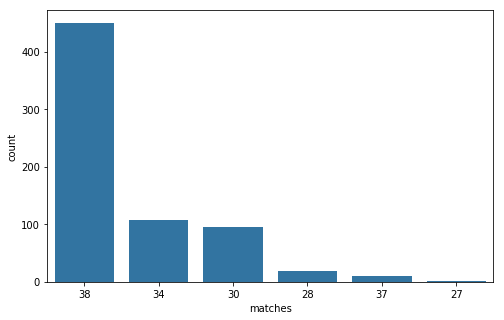

In [9]:
count_plot(df=df, x='matches')

  It is interesting to observe that the teams didn't all play the same number of matches; most of the teams played 38 matches while about 100 teams played 34 and 30 matches and others played 28, 37 and 27 respectively, so I might want to do a feature engineering so that I get points based on the number of matches played to even it up.

In [10]:
# Feature engineers point per match columns to account for teams that played less than 38 matches

df['pts_per_match'] = df['pts']/df['matches']

In [11]:
# defines a function to plot histograms
def plot_hist (data, x, binsize, xlabel):
    plt.figure(figsize=[8, 5])
    bins = np.arange(data[x].min()-1, data[x].max()+1, binsize)
    plt.hist(data = data, x = x, bins=bins)
    plt.xlabel(xlabel);


What's the distribution of one of the main variables of interest: points gathered?

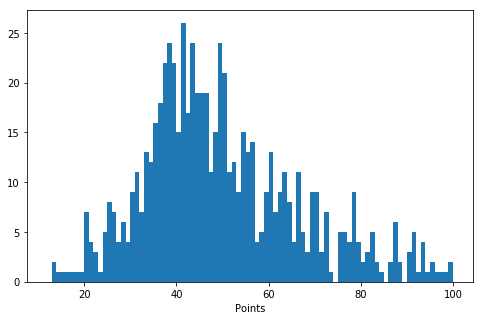

In [12]:
plot_hist(data=df, x='pts', binsize=1, xlabel='Points')

For number of points gathered, the distribution is skewed to the right with most teams gathering between 35 and 50 points and the more successful teams gathered over 80 points.

It would be interesting to see the distribution of the engineered column: pts_per_match

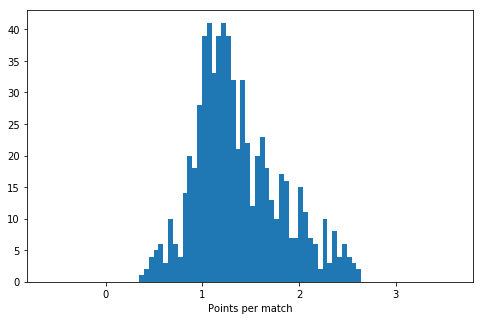

In [13]:
plot_hist(data=df, x='pts_per_match', binsize=0.05, xlabel='Points per match')

Points per match appears to almost mirror the distribution of points with a long right tail

What's the distribution of the first predictor variable of interest: number of wins?

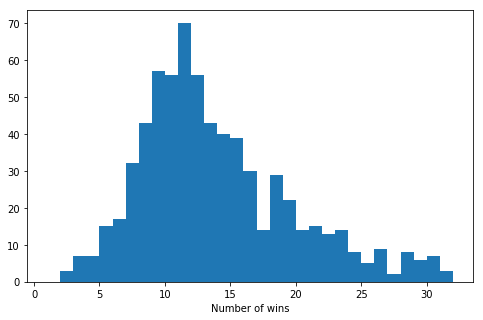

In [14]:
plot_hist(data=df, x='wins', binsize=1, xlabel='Number of wins')

Just like points, this distribution is also right skewed and is very similar in shape to the distribution of points gathered; this could be an indication that they have a good relationship

What's the distribution of the second predictor variable of interest: number of goals scored?

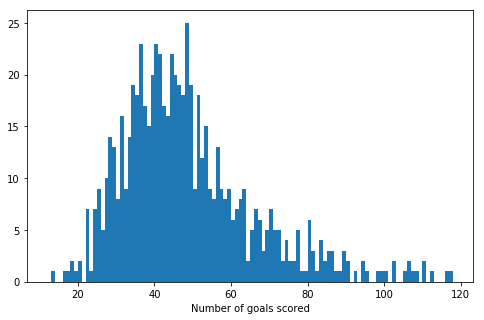

In [15]:
plot_hist(data=df, x='scored', binsize=1, xlabel='Number of goals scored')

Just like points and wins, this distribution is also right skewed and is very similar in shape to both of them; this could be an indication that they all have a good positive relationship

It would also be interesting to see the distribution of number of matches lost

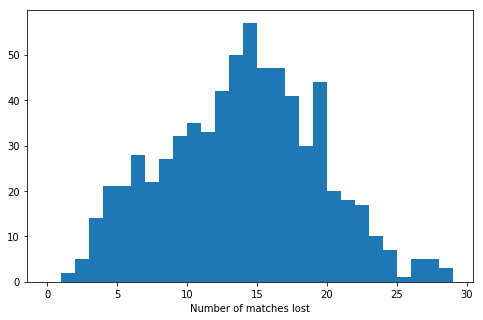

In [16]:
plot_hist(data=df, x='loses', binsize=1, xlabel='Number of matches lost')

The distribution appears normal but it also shows a left skew which is different from the distributions already observed above (points, win, scored)

Next we look at the distribution of number of goals conceded

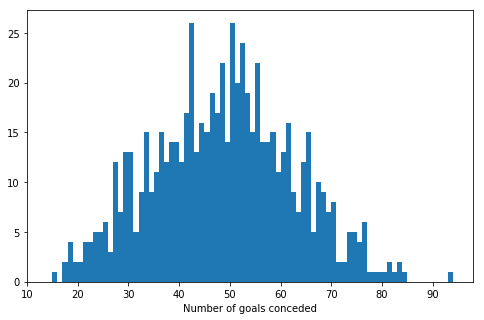

In [17]:
plot_hist(data=df, x='conceded', binsize=1, xlabel='Number of goals conceded')

The distribution is simalar to that of the loses, it appears normal.

Next we look at the distribution of number of passes within 20 yards of the opponent's goal

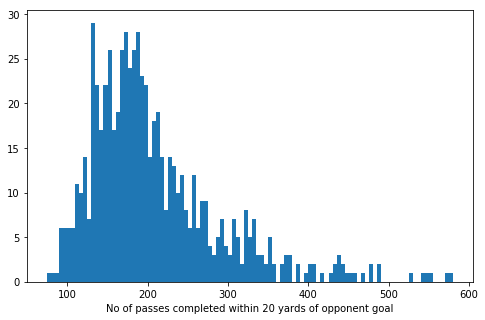

In [18]:
plot_hist(data=df, x='passes', binsize=5, xlabel='No of passes completed within 20 yards of opponent goal')

This distribution if right skewed, just like points, win and scored.

Next we look at the distribution of the number of passes the opponent makes within 20 yards of the team's goal

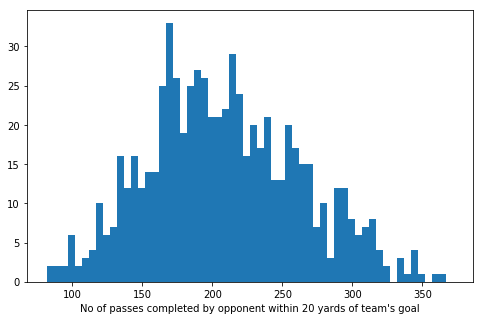

In [19]:
plot_hist(data=df, x='passes_allowed', binsize=5, xlabel='No of passes completed by opponent within 20 yards of team\'s goal')

This is a normal distribution

Next we look at number of passes allowed per defensive action by the team

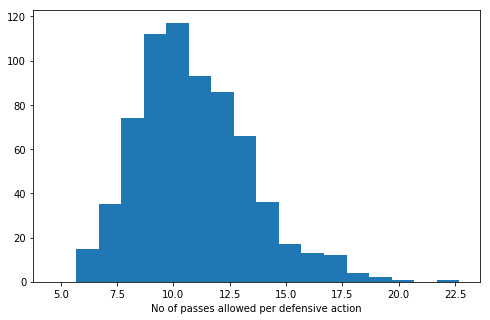

In [20]:
plot_hist(data=df, x='ppda_coef', binsize=1, xlabel='No of passes allowed per defensive action')

This is skewed to the right, which means that there are good number of teams that allow the opponent make many passes before taking defensive action.

Next we look at the number of leagues represented

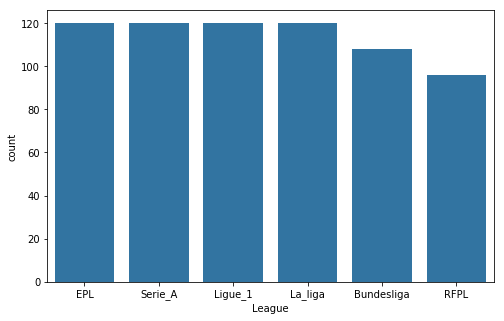

In [21]:
count_plot(df=df, x='League')

Serie_A, Ligue_1, La_liga and EPL had 120 representations while Bundesliga and RFPL have the lower representations because unlike the aforementioned four leagues that have 20 teams in the top flight per season, the Bundesliga has 18, while the RFPL has 16. 

Now to the years

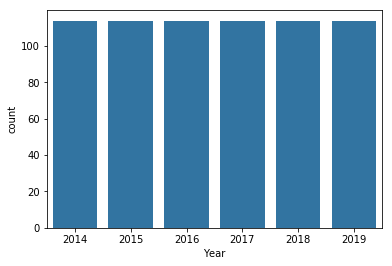

In [22]:
color= sb.color_palette()[0]
sb.countplot(data=df, x='Year', order=['2014', '2015', '2016', '2017', '2018', '2019'], color=color);

Each year has 114 representations

Which teams are most frequent in the top flight?

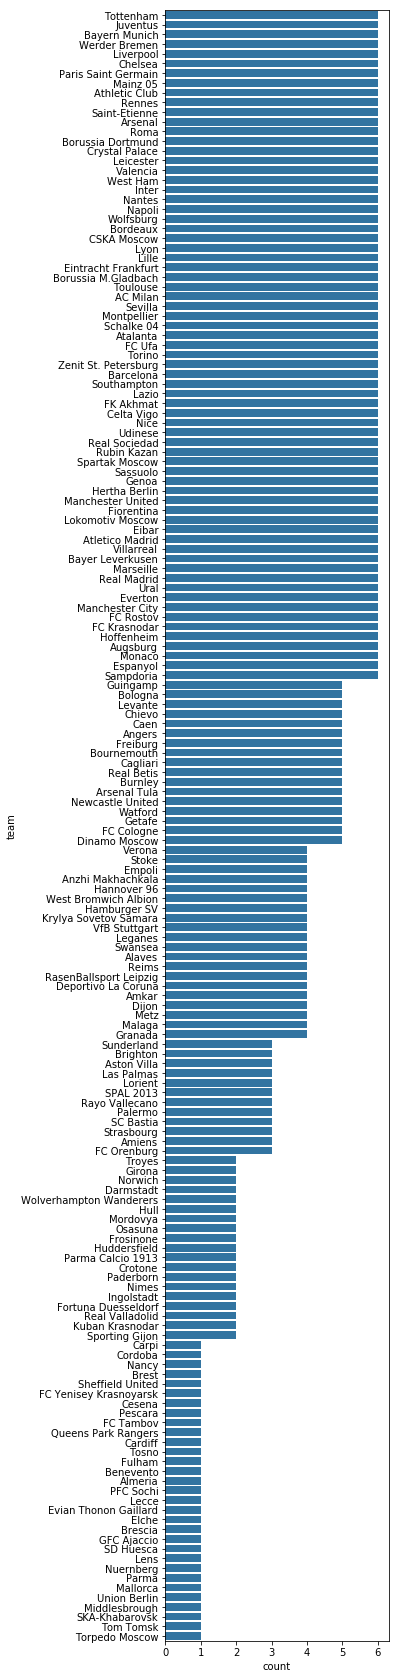

In [23]:
color = sb.color_palette()[0]
order = df.team.value_counts().index
plt.figure(figsize=[4,30])
sb.countplot(data=df, y='team', order=order, color=color)

There are a few teams that spent the entire 6 seasons in the top flight while there were others who were relegated from the top flight at some point thus they spent less than 6 seasons in the top flight and others were promoted.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of goals scored, wins and points were right skewed, while the distribution of loses and goals conceded are normal distributions

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions but I had to remove some rows of matches because I felt it would affect the data!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Here I observe the pairwise correlation between features in the dataset

In [24]:
numeric = ['pts', 'pts_per_match', 'wins', 'scored', 'passes', 'loses', 'conceded', 'passes_allowed', 'ppda_coef']

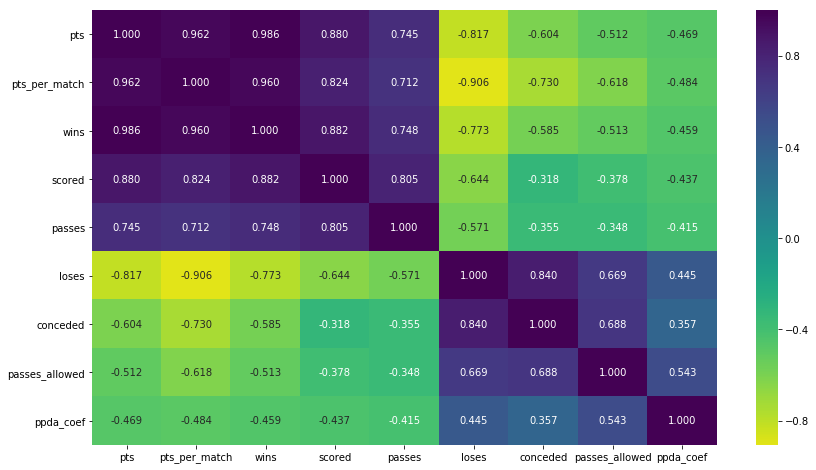

In [25]:
plt.figure(figsize = [14, 8])
sb.heatmap(df[numeric].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r', center = 0);

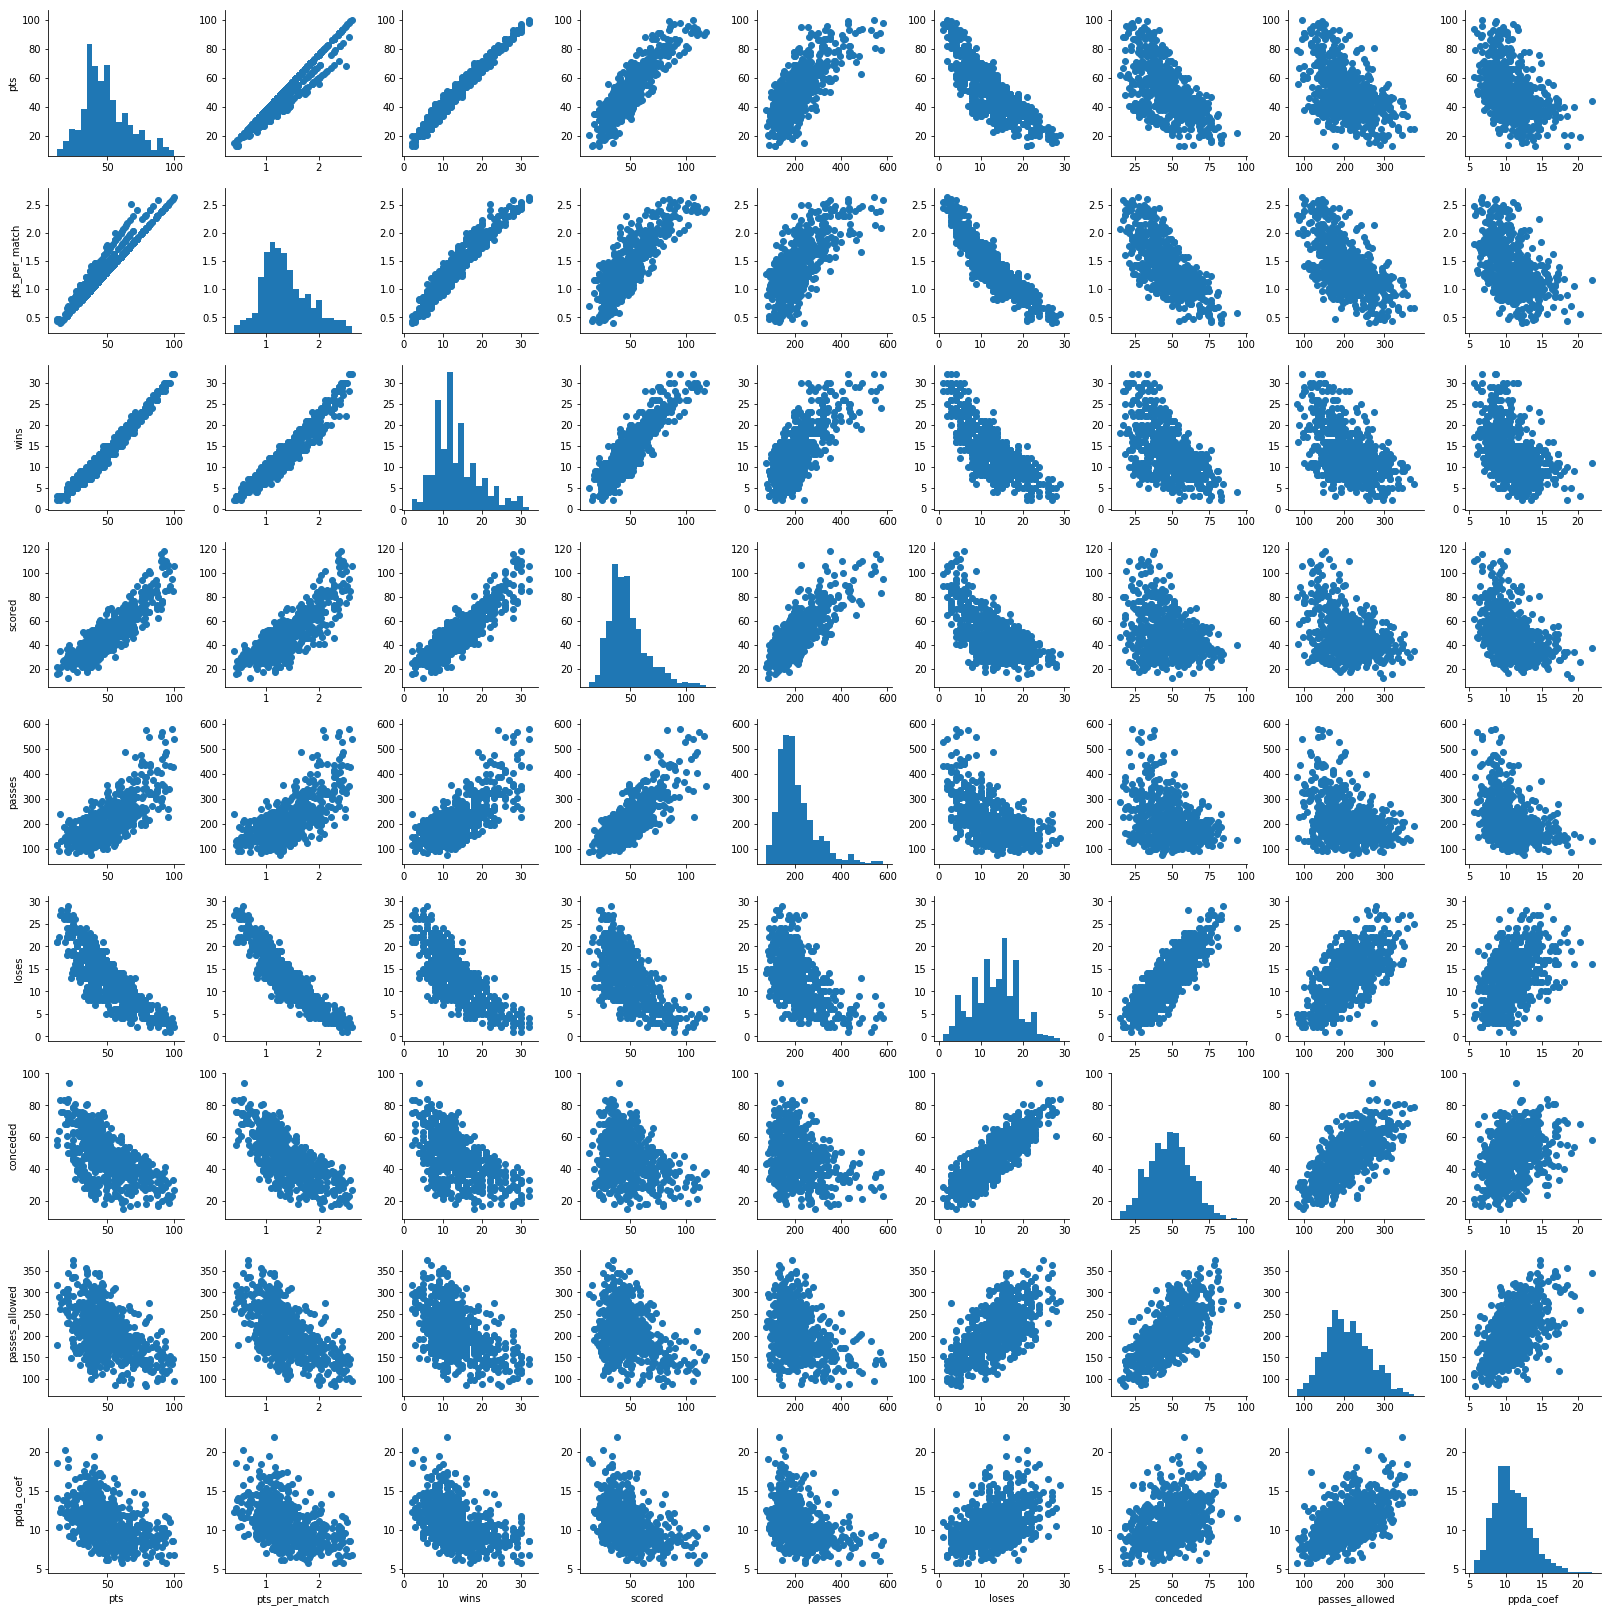

In [26]:
g = sb.PairGrid(data = df, vars = numeric)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

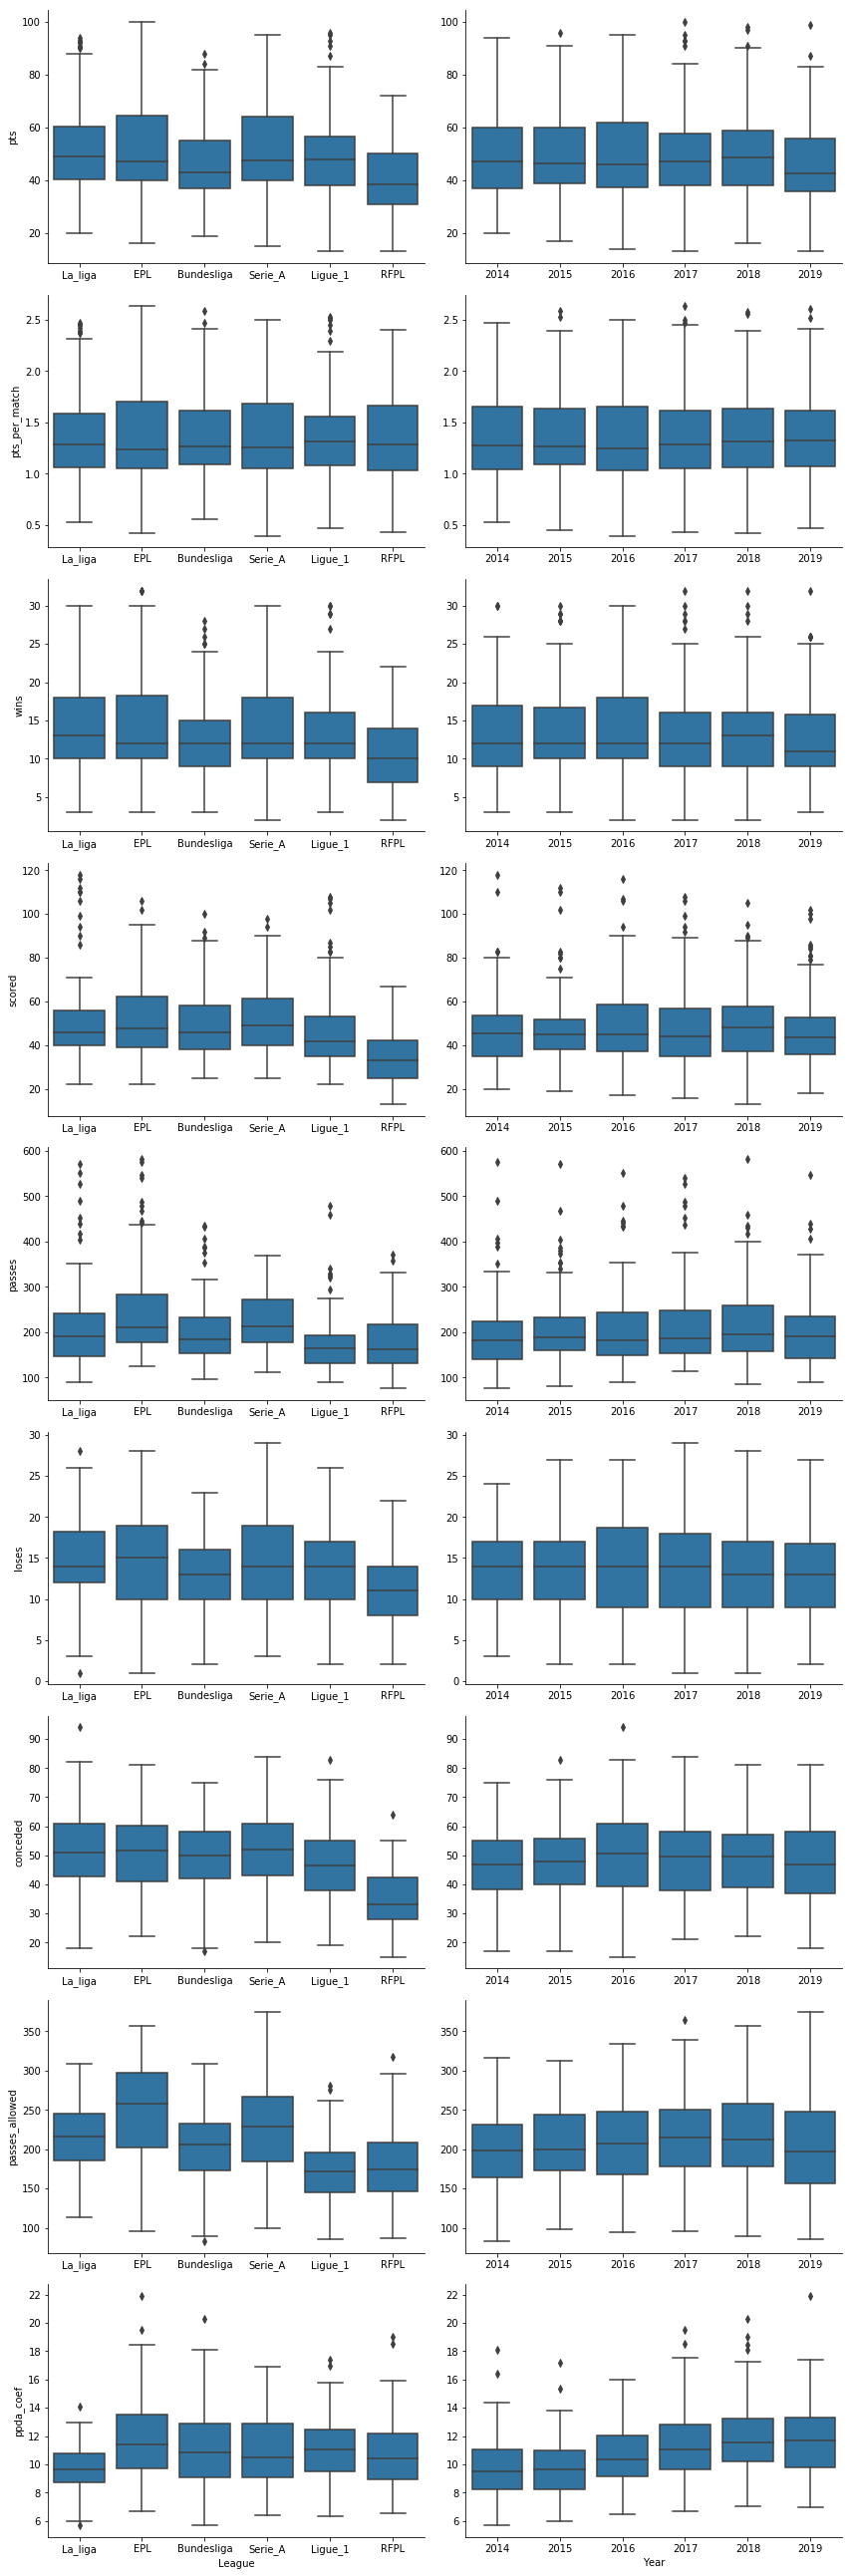

In [27]:
def boxgrid(x, y, **kwargs):
    """ Creates box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['pts', 'pts_per_match', 'wins', 'scored', 'passes', 'loses', 'conceded', 'passes_allowed', 'ppda_coef'],
                x_vars = ['League', 'Year'],
                size = 4, aspect = 1.5);
g.map(boxgrid);

In [28]:
df_copy = df.copy()

In [39]:
df_copy['win_per_match'] = df_copy['wins']/df_copy['matches']
df_copy['scored_per_match'] = df_copy['scored']/df_copy['matches']
df_copy['loses_per_match'] = df_copy['loses']/df_copy['matches']
df_copy['conceded_per_match'] = df_copy['conceded']/df_copy['matches']
df_copy['passes_per_match'] = df_copy['passes']/df_copy['matches']

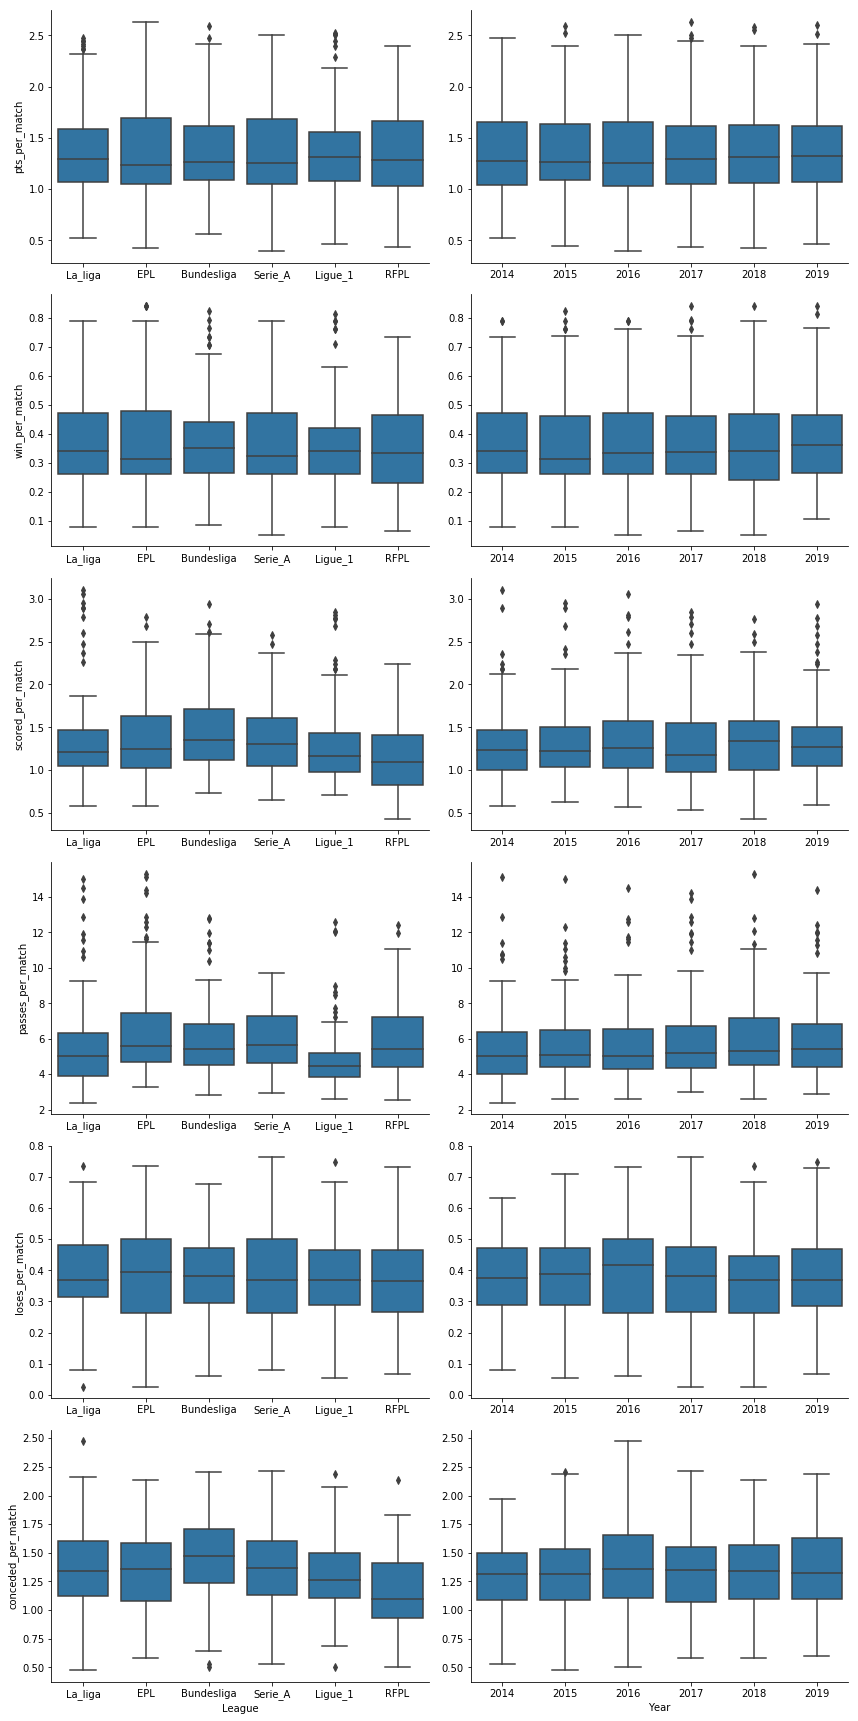

In [40]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_copy, y_vars = ['pts_per_match', 'win_per_match', 'scored_per_match', 'passes_per_match','loses_per_match', 'conceded_per_match'],
                x_vars = ['League', 'Year'],
                size = 4, aspect = 1.5);
g.map(boxgrid);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected, pts had a very positive relationship with pts_per_game, wins, scored and passes but points had a negative relationship with loses, conceded, passes allowed and ppda_coef. The most points were gathered in the EPL when considering just points but when it is considered that some leagues play more matches than others, so there would be chances for more points in some leagues when compared to the other, the point per match plot shows that all the leagues have similar points. This same analogy goes for win, scored, loses and conceded, the other variables are already averages, the Bundesliga and RFPL are at a disadvantage because they play less matches, so they win less and lose less and win less as well, so new per match features were engineered and plotted and it was discovered that all the leagues had similar points, wins and loses per match but more goals were scored and conceded on average in the Bundesliga while the RFPL had less goals scored and conceded, 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Here I try visualize the relationship between win a match and gathering points

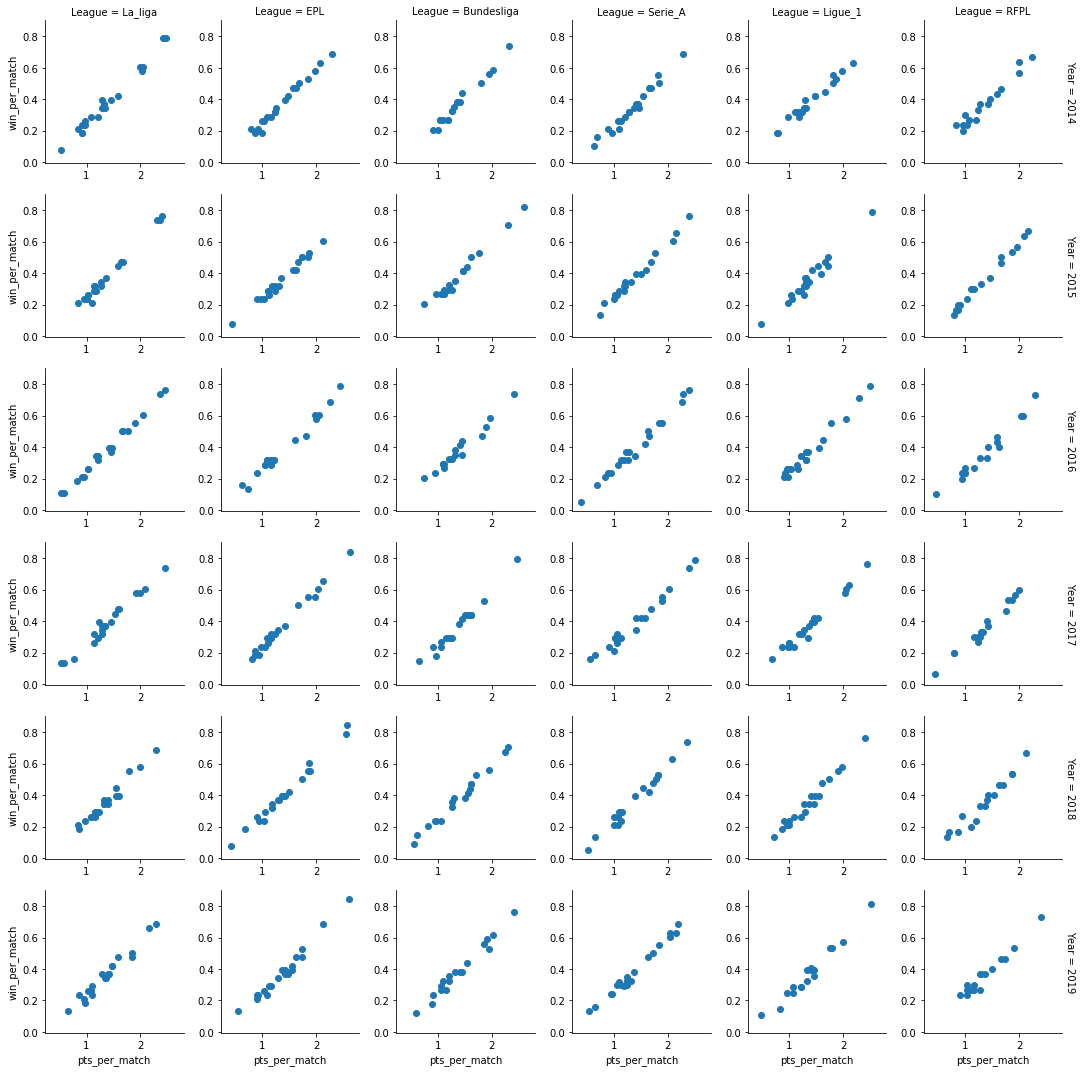

In [32]:
g = sb.FacetGrid(data = df_copy, col = 'League', row = 'Year', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'pts_per_match', 'win_per_match');

Across all leagues and years, a win result in more points as should be expected

It would be interesting to see if the relationship between goals scored and points is as clear cut as the relationship between wins and points

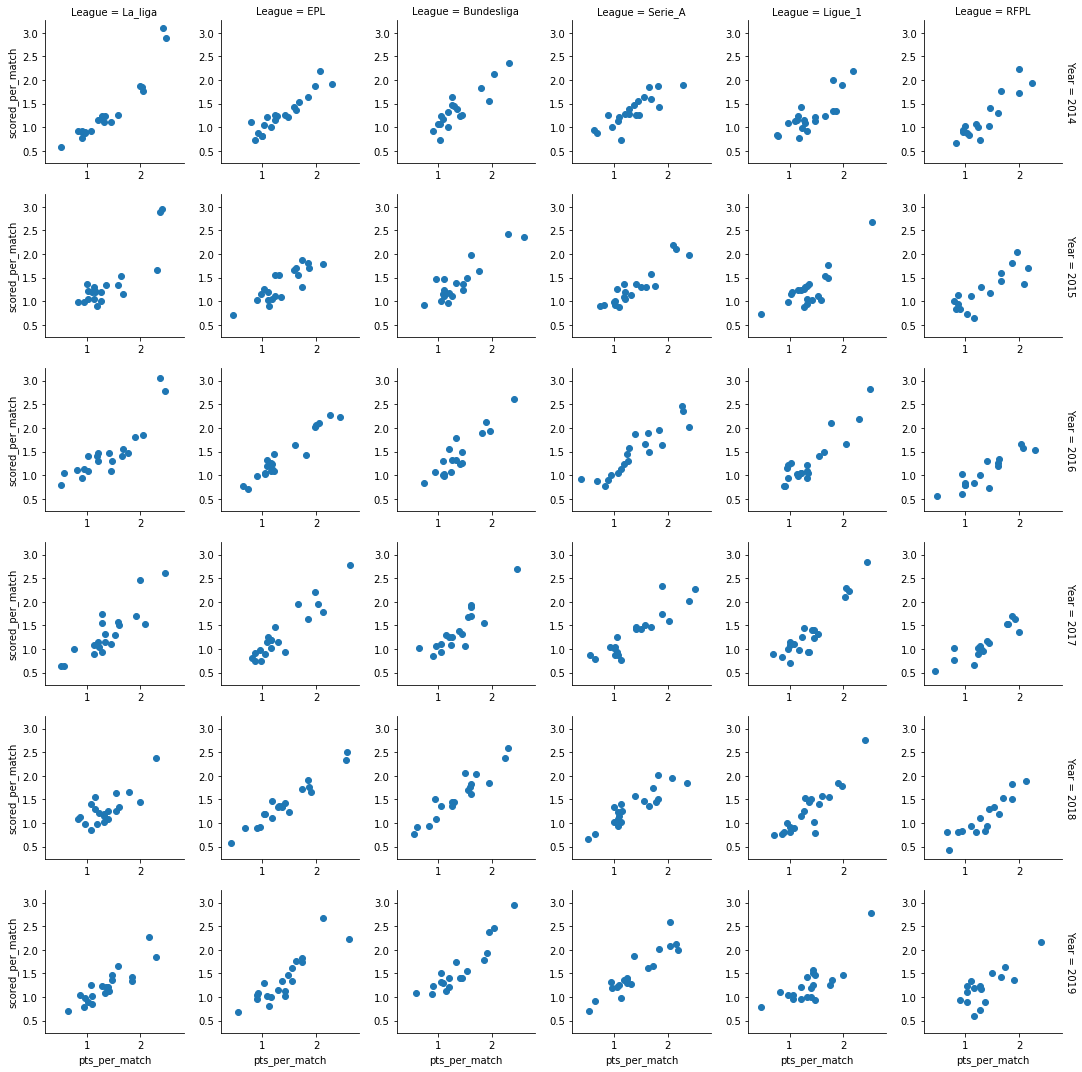

In [37]:
g = sb.FacetGrid(data = df_copy, col = 'League', row = 'Year', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'pts_per_match', 'scored_per_match');

As it turns out, that relationship is not so clear cut; scoring more goals doesn't neccesarily lead to more points with a notable example being ligue_1 in 2014, 2015 and 2019 in which the relationship doesn't appear to be very strong.

It would also be interesting to see which league had the most passes within 20 yards of the opponent goal per match

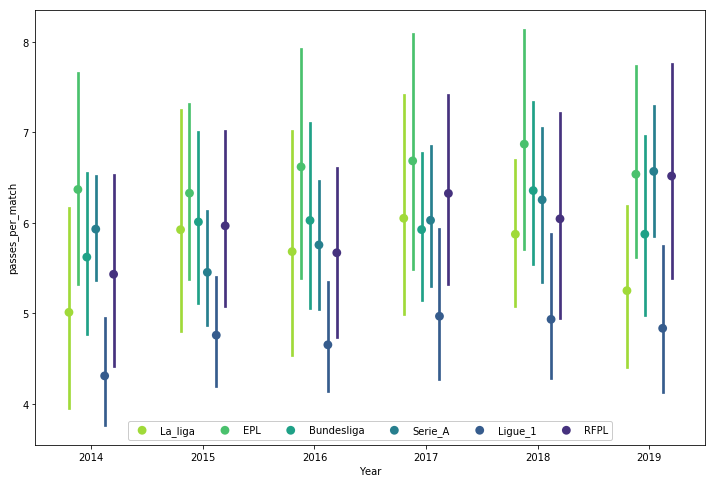

In [46]:
fig = plt.figure(figsize = [12,8])
ax = sb.pointplot(data = df_copy, x = 'Year', y = 'passes_per_match', hue = 'League',
           palette = 'viridis_r', linestyles = '', dodge = 0.4)
ax.legend(loc=8, ncol=7, framealpha=1);

The EPL had the most passes on average close to the opponent's goal while ligue_1 had the least passes on average  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The points gotten directly correlated with wins, regardless of the league or year but the correlation of points with goals scored was not as strong because it takes more than scoring goals to get points!

### Were there any interesting or surprising interactions between features?

> It was interesting that the EPL had more passes close to the opponents goal than the other leagues and honestly I would have expected La liga to come up tops here because of Barcelona but it turns out that a team does not make a league!

## Conclusions
> The number of wins, goals scored and passes within 20 yards of the opponents goal correlate well with getting points but loses, conceded, passes allowed and ppda_coef didn't.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

